In [309]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [310]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [311]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [313]:
df.duplicated().sum()

0

In [314]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [315]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [316]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [317]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace =True)

In [318]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [319]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [320]:
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)


In [321]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [322]:
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Balance'>

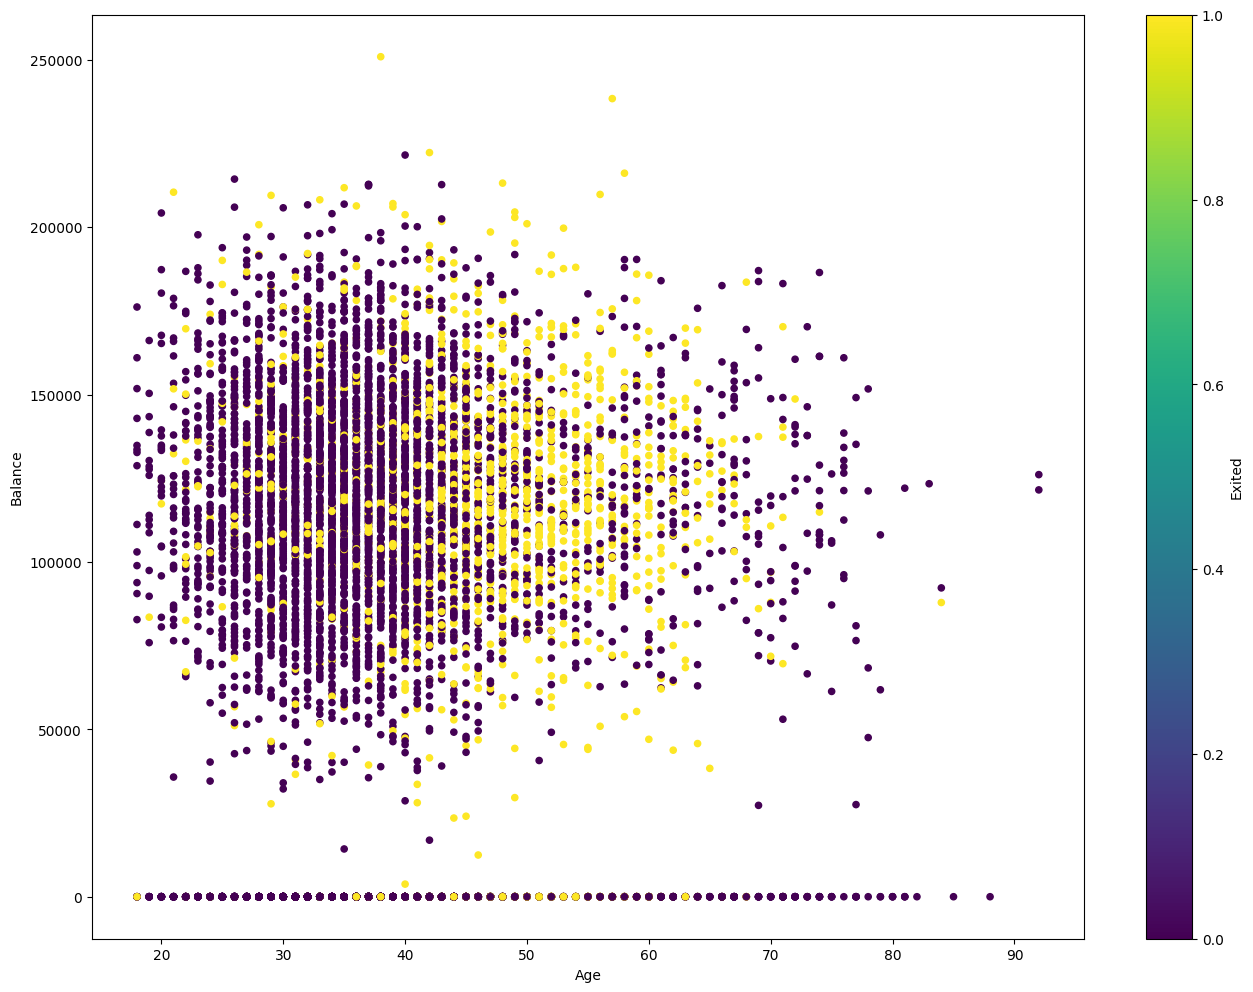

In [323]:
df.plot.scatter(x='Age', y='Balance', c='Exited', colormap='viridis', figsize=(16,12))

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [325]:
x = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [326]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [327]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [328]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [329]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [345]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [346]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim = 11))
model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [347]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [348]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [349]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6798 - loss: 0.6311 - val_accuracy: 0.7975 - val_loss: 0.4879
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7931 - loss: 0.4810 - val_accuracy: 0.7975 - val_loss: 0.4500
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4365 - val_accuracy: 0.7975 - val_loss: 0.4318
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4284 - val_accuracy: 0.8087 - val_loss: 0.4240
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.4057 - val_accuracy: 0.8194 - val_loss: 0.4112
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8223 - loss: 0.4001 - val_accuracy: 0.8250 - val_loss: 0.3994
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: 0.3903 - val_accuracy: 0.8381 - val_loss: 0.3876
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3834 - val_accu

In [341]:
model.layers[1].get_weights()

[array([[-5.78687079e-02, -4.22762156e-01, -5.98447442e-01,
          6.14371598e-01, -3.69079828e-01,  9.33561176e-02,
         -9.20776352e-02,  8.60682130e-02],
        [ 4.76763934e-01,  3.61520857e-01,  1.42409071e-01,
          4.25588414e-02,  4.06656154e-02,  8.40711951e-01,
         -4.97922190e-02,  4.15026277e-01],
        [-5.58912575e-01,  7.07436353e-04,  6.70867443e-01,
          1.02142170e-01,  5.40413678e-01,  4.42360222e-01,
          7.43217468e-01,  1.01279803e-02],
        [ 6.31988287e-01, -1.49140656e-01,  1.64246708e-01,
          1.00898631e-01,  5.53319380e-02,  5.16657352e-01,
          6.45162940e-01, -3.03812087e-01],
        [ 2.60726959e-01, -2.57805377e-01,  5.98458707e-01,
         -6.77526891e-01, -1.68027375e-02,  9.12773237e-02,
          3.86663973e-01,  6.36344373e-01],
        [-1.25549227e-01, -7.65895605e-01,  1.96223930e-01,
          4.17328402e-02,  1.33911192e-01, -2.38835052e-01,
          1.49673864e-01, -1.04690604e-01],
        [ 2.4537

In [342]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [343]:
y_pred = np.where(y_log>0.5,1,0)

In [344]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

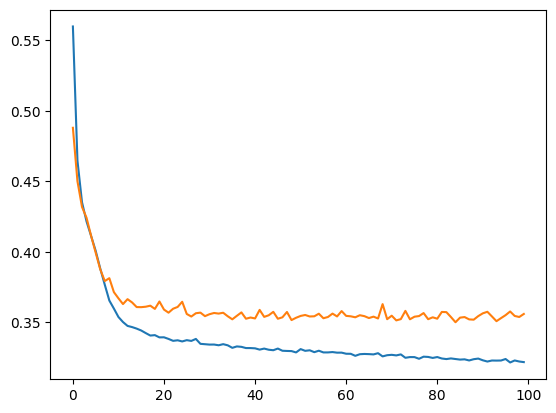

In [354]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

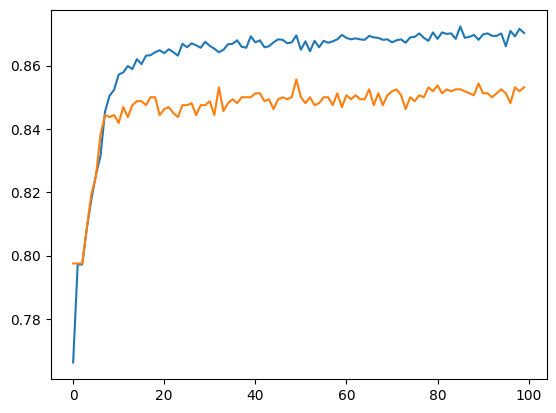

In [355]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])